Introduction 

Dataset ready for analysis showing real property information, including most recent sales price as of July 2018, for properties located in Washington, D.C.

Objective -  Identify predictive features for the price of a house.

DATA 

Data Set Characteristics:  

        Number of rows : 158589
        Number of Columns : 49

ID    
BATHRM: Number of full bathromm    
HF_BATHRM : Number of Half Bathrooms (no bathtub or shower)
HEAT : Heating
AC : Cooling
NUM_UNITS :Number of Units
ROOMS: Number of Rooms
BEDRM: Number of Bedrooms
AYB : The earliest time the main portion of the building was built
YR_RMDL : Year structure was remodeled
EYB : The year an improvement was built more recent than actual year built
STORIES : Number of stories in primary dwelling
SALEDATE :Date of most recent sale
PRICE : Price of most recent sale
QUALIFIED : Qualified
SALE_NUM : Sale Number
GBA : Gross building area in square feet
BLDG_NUM : Building Number on Property
STYLE :Style
STRUCT: Structure
GRADE :Grade
CNDTN: Condition
EXTWALL: Extrerior wall
ROOF :Roof type
INTWALL :Interior wall
KITCHENS :Number of kitchens
FIREPLACES: Number of fireplaces
USECODE : Property use code
LANDAREA :Land area of property in square feet
GIS_LAST_MOD_DTTM : Last Modified Date
SOURCE: Raw Data Source
CMPLX_NUM : Complex number
LIVING_GBA : Gross building area in square feet
FULLADDRESS: Full Street Address
CITY : City
STATE: State
ZIPCODE: Zip Code
NATIONALGRID: Address location national grid coordinate spatial address
LATITUDE: Latitude
LONGITUDE: Longitude
ASSESSMENT_NBHD: Neighborhood ID
ASSESSMENT_SUBNBHD : Subneighborhood ID
CENSUS_TRACT: Census tract
CENSUS_BLOCK : Census block
WARD  : Ward (District is divided into eight wards, each with approximately 75,000 residents)
SQUARE: Square (from SSL)
X:longitude
Y: latitude
QUADRANT : City quadrant (NE,SE,SW,NW)

    



1. Cleaning the data 

In [57]:
# 1.1 Import the libraries needed  and Load the data to Jupyter notebook 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

%matplotlib inline
df = pd.read_csv("datasets/DC_Properties.csv")

C:\Python\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# Check if the data is loaded corectly by printing the first 5 rows
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [10]:
# 1.2  Check dupilicate rows 
dupe = df.duplicated() #creates list of True/False values
df[dupe]


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT


The obove output shows no dupilicate rows

1.3 In this section we look at the distribution of the variable of interest PRICE 


In [13]:
PRICE2 =df['PRICE']
PRICE2.describe()

count    9.821600e+04
mean     9.313516e+05
std      7.061325e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.999990e+05
75%      6.520000e+05
max      1.374275e+08
Name: PRICE, dtype: float64

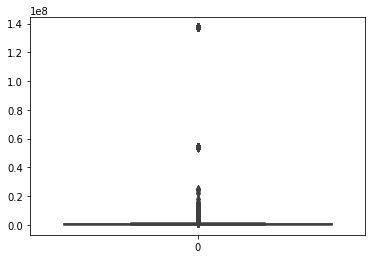

In [14]:

#plt.ylim(-1e8,2e8)
sns.boxplot(data=PRICE2)


The Box plot of Price shows outliers 

C:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


[Text(0.5,0,'PRICE')]

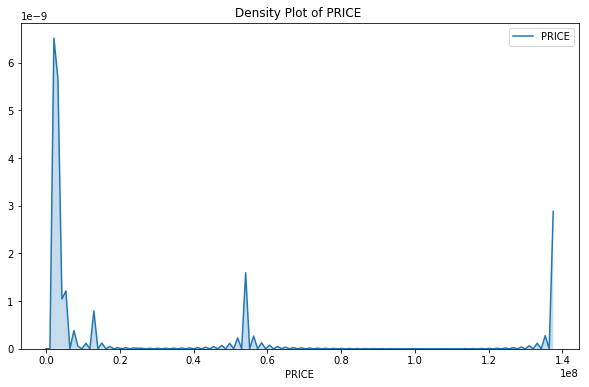

In [5]:
#Density plot
plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['PRICE'],
                 shade=True)


plt.title("Density Plot of PRICE ")

ax.set(xlabel='PRICE')


Depending on the above plots and summary for Price we decided to remove outliers. 


In [15]:
#Standard Deviation Method  to remove outlier 

meanprice = df['PRICE'].mean()
stdgrade = df['PRICE'].std()
toprange = meanprice + stdgrade * 1.96
botrange = meanprice - stdgrade * 1.96

copydf = df.copy() #to not mess up the original df
copydf = copydf.drop(copydf[copydf['PRICE'] > toprange].index)
copydf = copydf.drop(copydf[copydf['PRICE'] < botrange].index)

copydf.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [31]:
copydf.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158589.000000,158589.000000,158589.000000,106689.000000,158589.000000,158589.000000,158318.000000,80563.000000,158589.000000,106645.000000,...,158589.000000,158589.000000,51900.000000,51900.000000,158588.000000,158588.000000,158588.000000,158588.000000,158352.000000,158352.000000
mean,79363.904829,1.812005,0.458998,1.198052,6.194389,2.736400,1941.905260,1998.211152,1963.682349,2.091801,...,14.247703,2475.457636,2373.204239,890.292042,20012.695292,38.914829,-77.016576,5351.397180,-77.016611,38.914821
std,45875.039836,0.976084,0.587505,0.596910,2.614676,1.356997,33.623031,16.606190,24.934876,2.933407,...,3.728229,5042.994960,1116.530888,421.024133,15.643138,0.031745,0.040920,3366.622947,0.040915,0.031704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39652.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,700.000000,1499.000000,617.000000,20007.000000,38.895425,-77.042803,2102.000000,-77.042806,38.895432
50%,79299.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1650.000000,2265.000000,785.000000,20011.000000,38.915262,-77.019479,5201.000000,-77.019473,38.915212
75%,118948.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2907.250000,1063.000000,20018.000000,38.936071,-76.988562,8302.000000,-76.988837,38.936064
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


After removing outlier 

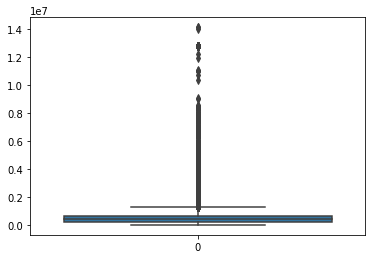

In [89]:
PDF2 =copydf['PRICE']
#plt.ylim(-1e8,2e8)
sns.boxplot(data=PDF2)

C:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


[Text(0.5,0,'PRICE')]

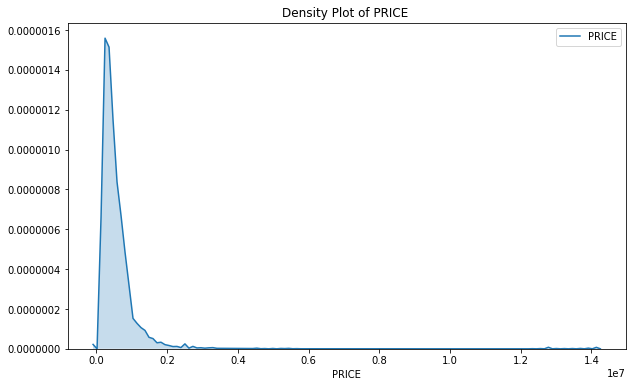

In [20]:
#Density plot
plt.figure(figsize=(10,6))

ax = sns.kdeplot(copydf['PRICE'],
                 shade=True)


plt.title("Density Plot of PRICE ")

ax.set(xlabel='PRICE')

1.4  In this section we deal with missing values 

In [23]:
copydf.shape  # From this output we can see a total of 158957 rows and 49 columns 

(158589, 49)

The following table shows missing values for some variables(columns)

In [26]:
copydf.count()  ### Number of rows for each columns

Unnamed: 0            158589
BATHRM                158589
HF_BATHRM             158589
HEAT                  158589
AC                    158589
NUM_UNITS             106689
ROOMS                 158589
BEDRM                 158589
AYB                   158318
YR_RMDL                80563
EYB                   158589
STORIES               106645
SALEDATE              131819
PRICE                  97848
QUALIFIED             158589
SALE_NUM              158589
GBA                   106689
BLDG_NUM              158589
STYLE                 106689
STRUCT                106689
GRADE                 106689
CNDTN                 106689
EXTWALL               106689
ROOF                  106689
INTWALL               106689
KITCHENS              106688
FIREPLACES            158589
USECODE               158589
LANDAREA              158589
GIS_LAST_MOD_DTTM     158589
SOURCE                158589
CMPLX_NUM              51900
LIVING_GBA             51900
FULLADDRESS           106033
CITY          

In [25]:
#drop rows with any missing data
dfnew = copydf[pd.notnull(copydf['PRICE'])]
dfnew.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,97848.000000,97848.000000,97848.000000,57893.000000,97848.000000,97848.000000,97736.000000,57309.000000,97848.000000,57860.000000,...,97848.000000,97848.000000,39955.000000,39955.000000,97848.000000,97848.000000,97848.000000,97848.000000,97747.000000,97747.000000
mean,85161.214884,1.861489,0.445722,1.221098,5.931618,2.612317,1944.781524,2000.636654,1965.709733,2.124686,...,14.606165,2086.359118,2445.235140,883.923214,20012.303236,38.913867,-77.017919,5294.645583,-77.017943,38.913858
std,47642.695086,0.977711,0.576093,0.623975,2.633308,1.391526,36.247965,16.183546,27.530566,3.948987,...,3.688147,2705.453130,1139.919833,407.040367,16.354462,0.030216,0.039764,3283.044860,0.039757,0.030192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,199.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,42811.750000,1.000000,0.000000,1.000000,4.000000,2.000000,1917.000000,1991.000000,1954.000000,2.000000,...,11.000000,486.000000,1575.000000,620.000000,20005.000000,38.895924,-77.042707,2202.000000,-77.042709,38.895653
50%,89118.500000,2.000000,0.000000,1.000000,6.000000,3.000000,1938.000000,2005.000000,1965.000000,2.000000,...,13.000000,1388.000000,2284.000000,784.000000,20010.000000,38.913911,-77.021292,5002.000000,-77.021174,38.913953
75%,128115.250000,2.000000,1.000000,1.000000,7.000000,3.000000,1966.000000,2011.000000,1981.000000,2.000000,...,17.000000,2563.000000,2972.000000,1050.000000,20017.000000,38.933676,-76.990519,8100.000000,-76.990753,38.933633
max,158955.000000,12.000000,11.000000,6.000000,30.000000,20.000000,2018.000000,2019.000000,2018.000000,826.000000,...,117.000000,187301.000000,5621.000000,8553.000000,20392.000000,38.995435,-76.909758,11100.000000,-76.910511,38.993646


2. EXPLORATORY ANALYSIS 

In [27]:
dfnew.describe().PRICE

count    9.784800e+04
mean     5.278485e+05
std      5.977699e+05
min      1.000000e+00
25%      2.400000e+05
50%      3.999000e+05
75%      6.500000e+05
max      1.415713e+07
Name: PRICE, dtype: float64

In [31]:
pd.pivot_table(dfnew, values=['PRICE'], index=['QUADRANT'])

,PRICE
QUADRANT,
NE,392871.547763
NW,632856.517928
SE,365112.606875
SW,347048.948019


The table shows the average price of houses by quadrant. The price is high in NW followed by NE

In [32]:
dfnew.groupby('WARD')['PRICE'].mean()

WARD
Ward 1    573836.311714
Ward 2    686519.347544
Ward 3    770604.211288
Ward 4    489922.405538
Ward 5    395243.226660
Ward 6    526868.437066
Ward 7    233922.176043
Ward 8    263623.662416
Name: PRICE, dtype: float64

The above table shows the average price of houses by ward. The price is high in Ward 3 followed by Ward 2.

In [28]:
df3 = df[['BATHRM','HF_BATHRM','HEAT','AC','ROOMS','BEDRM','AYB','PRICE','YR_RMDL','SALEDATE','GBA',
          'STYLE','GRADE','CNDTN','LANDAREA','WARD','QUADRANT']]
df3.head()

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,PRICE,YR_RMDL,SALEDATE,GBA,STYLE,GRADE,CNDTN,LANDAREA,WARD,QUADRANT
0,4,0,Warm Cool,Y,8,4,1910.0,1095000.0,1988.0,2003-11-25 00:00:00,2522.0,3 Story,Very Good,Good,1680,Ward 2,NW
1,3,1,Warm Cool,Y,11,5,1898.0,NaN,2007.0,2000-08-17 00:00:00,2567.0,3 Story,Very Good,Good,1680,Ward 2,NW
2,3,1,Hot Water Rad,Y,9,5,1910.0,2100000.0,2009.0,2016-06-21 00:00:00,2522.0,3 Story,Very Good,Very Good,1680,Ward 2,NW
3,3,1,Hot Water Rad,Y,8,5,1900.0,1602000.0,2003.0,2006-07-12 00:00:00,2484.0,3 Story,Very Good,Good,1680,Ward 2,NW
4,2,1,Warm Cool,Y,11,3,1913.0,NaN,2012.0,NaN,5255.0,3 Story,Very Good,Good,2032,Ward 2,NW


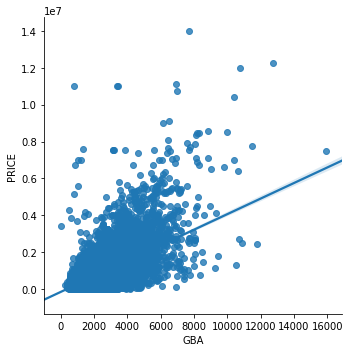

In [35]:
sns.lmplot(x='GBA', y='PRICE', data=dfnew)

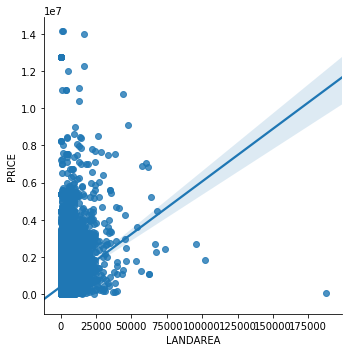

In [37]:
sns.lmplot(x='LANDAREA', y='PRICE', data=dfnew)

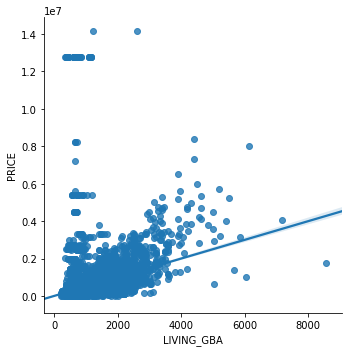

In [39]:
sns.lmplot(x='LIVING_GBA', y='PRICE', data=dfnew)

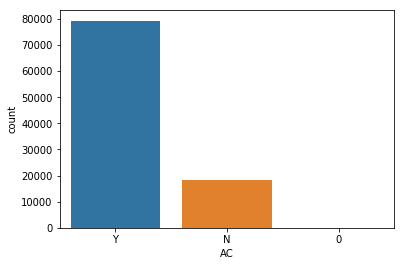

In [40]:
#bar chart of properties with AC and non AC
sns.countplot(x='AC', data=dfnew)


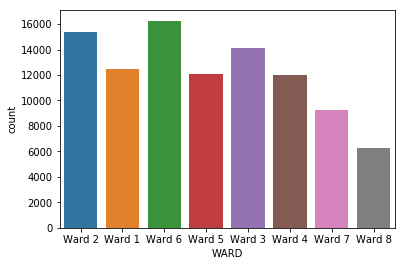

In [41]:
sns.countplot(x='WARD', data=dfnew)

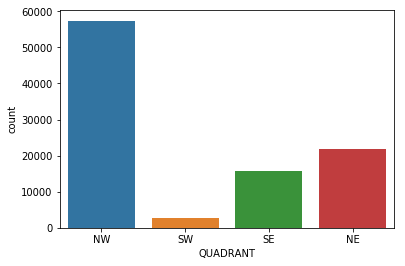

In [42]:
sns.countplot(x='QUADRANT', data=dfnew)

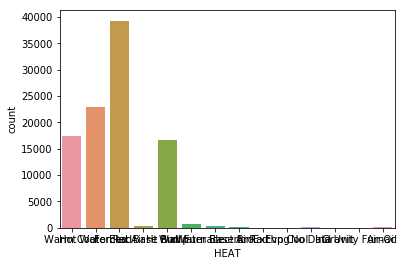

In [43]:
sns.countplot(x='HEAT', data=dfnew)

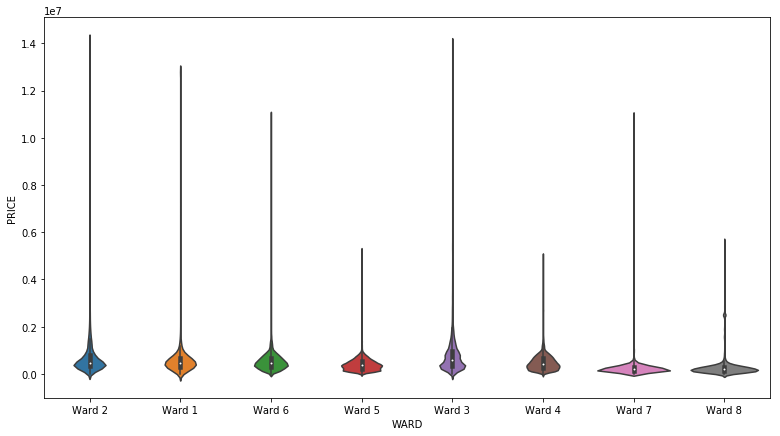

In [36]:
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of attack power for each type
sns.violinplot(x='WARD', y='PRICE', data=dfnew)

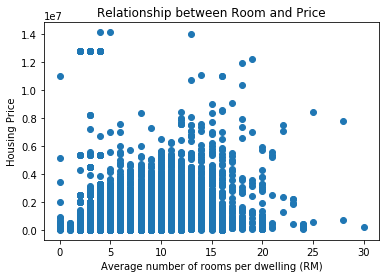

In [52]:
#compare number of rooms to home price
plt.scatter(dfnew2['ROOMS'], dfnew2['PRICE']) 
plt.xlabel("Average number of rooms per dwelling (RM)") 
plt.ylabel("Housing Price") 
plt.title("Relationship between Room and Price") 
plt.show()

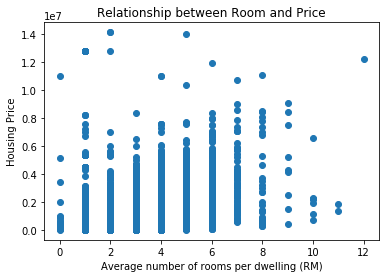

In [53]:
plt.scatter(dfnew2['BATHRM'], dfnew2['PRICE']) 
plt.xlabel("Average number of rooms per dwelling (RM)") 
plt.ylabel("Housing Price") 
plt.title("Relationship between Room and Price") 
plt.show()

In [46]:
dfnew2 = dfnew[['PRICE','BATHRM','HF_BATHRM','ROOMS','BEDRM','AYB','GBA','LANDAREA']]
dfnew2.corr()

,PRICE,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,GBA,LANDAREA
PRICE,1.000000,0.420305,0.235291,0.274292,0.283528,-0.035325,0.613021,0.256036
BATHRM,0.420305,1.000000,0.292055,0.709537,0.708634,-0.068478,0.696702,0.444378
HF_BATHRM,0.235291,0.292055,1.000000,0.392250,0.413532,-0.042940,0.254083,0.324128
ROOMS,0.274292,0.709537,0.392250,1.000000,0.847021,-0.222246,0.679271,0.519852
BEDRM,0.283528,0.708634,0.413532,0.847021,1.000000,-0.245185,0.646262,0.521318
AYB,-0.035325,-0.068478,-0.042940,-0.222246,-0.245185,1.000000,0.037411,-0.087834
GBA,0.613021,0.696702,0.254083,0.679271,0.646262,0.037411,1.000000,0.492381
LANDAREA,0.256036,0.444378,0.324128,0.519852,0.521318,-0.087834,0.492381,1.000000


Project 3 

In this project we build a linear regression model to identify features (columns) that may be correlated towards predicting the price of a home 

In [81]:
#make dataframe that only contains predictive features
dfnew3 = dfnew[['PRICE','BATHRM','ROOMS','BEDRM','LANDAREA']]
X = dfnew3.drop('PRICE', axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()
lm



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
dfnew3.count()

PRICE       97848
BATHRM      97848
ROOMS       97848
BEDRM       97848
GBA         57893
LANDAREA    97848
dtype: int64

In [65]:
dfnew3.describe()

,PRICE,BATHRM,ROOMS,BEDRM,GBA,LANDAREA
count,9.784800e+04,97848.000000,97848.000000,97848.000000,57893.000000,97848.000000
mean,5.278485e+05,1.861489,5.931618,2.612317,1724.847011,2086.359118
std,5.977699e+05,0.977711,2.633308,1.391526,819.787736,2705.453130
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.400000e+05,1.000000,4.000000,2.000000,1216.000000,486.000000
50%,3.999000e+05,2.000000,6.000000,3.000000,1504.000000,1388.000000
75%,6.500000e+05,2.000000,7.000000,3.000000,1983.000000,2563.000000
max,1.415713e+07,12.000000,30.000000,20.000000,15902.000000,187301.000000


In [77]:
dfnew3['PRICE'].dtypes

dtype('int64')

In [76]:
dfnew3['PRICE'] = dfnew3['PRICE'].apply(lambda x: int(x))


C:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
lm.fit(X, dfnew3['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
#y-intercept for the linear regression formula
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 104207.51163552556


In [84]:
#number of predictive features
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 4


In [87]:
#show the slope (weight) for each predictive feature
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,BATHRM,270010.152160
1,ROOMS,-18392.837186
2,BEDRM,-8211.763063
3,LANDAREA,24.718174


remove missing value from GBA and include it back to model

In [ ]:
result = smf.ols('PRICE ~ BATHRM + ROOMS + BEDRM + LANDAREA', data=dfnew3).fit()


Result Summary